In [1]:
! pip install autoviz
! pip install kagglehub

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from __future__ import print_function
import argparse
import os
import torch
import torchvision
import torchvision.utils
from torch.utils.data import DataLoader, Dataset
import cv2
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from PIL import Image
import torch.optim as optim
import time
from tqdm import tqdm
import requests

In [4]:
# Load in the Wafer images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

classes = ('Center', 'Donut', 'Edge Local', 'Edge Ring', 'Local', 'near full', 'none', 'random', 'Scratch')

# Use ImageFolder to load images from the extracted directory
trainset = datasets.ImageFolder(root='./WM811k_Dataset', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

print("Finished")

Finished


In [5]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

def img_loader(filename):
    return cv2.resize(cv2.imread(filename, cv2.IMREAD_GRAYSCALE), (32,32))

data = ImageFolder(root='./WM811k_Dataset/', loader=img_loader, transform=transform)
data.classes

['Center',
 'Donut',
 'Edge Local',
 'Edge Ring',
 'Local',
 'Scratch',
 'near full',
 'none',
 'random']

In [9]:
# Split dataset
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42)
print( f"training set: {len(train_data)} testing set: {len(test_data)}")

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

training set: 766 testing set: 136


In [11]:
# Examine a sample
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([4, 3, 32, 32])
torch.Size([4])


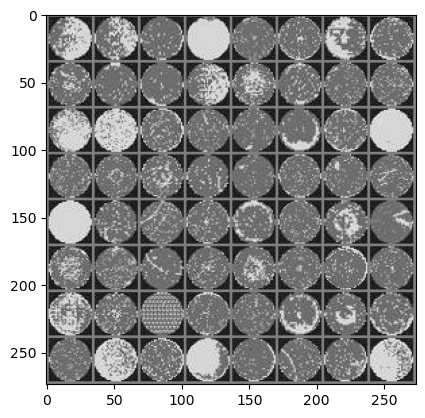

3


In [13]:
# Show sample images
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(len(test_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


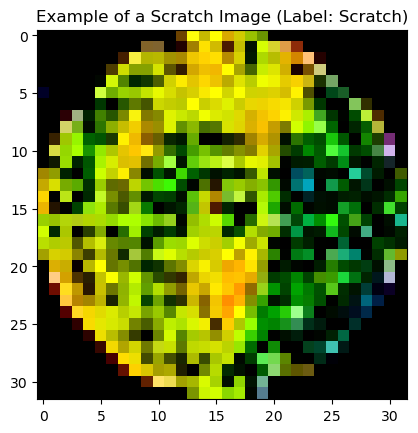

In [15]:
# Show a specific image related to the 'Scratch' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
scratch_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Scratch')]
if scratch_indices:
  scratch_index = scratch_indices[20]  # Take the first one

  # Get the image and label
  image, label = trainset[scratch_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Scratch Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Scratch' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


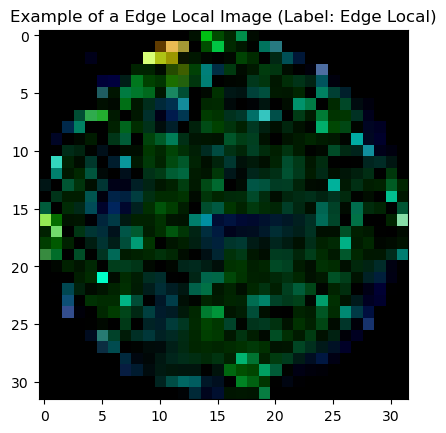

In [17]:
# Show a specific image related to the 'Edge Local' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
edge_local_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Edge Local')]
if edge_local_indices:
  edge_local_index = edge_local_indices[0]

  # Get the image and label
  image, label = trainset[edge_local_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Edge Local Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Edge Local' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


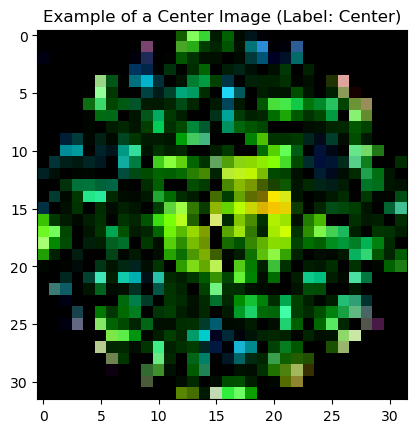

In [19]:
# Show a specific image related to the 'Center' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
center_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Center')]
if center_indices:
  center_index = center_indices[0] 

  # Get the image and label
  image, label = trainset[center_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Center Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Center' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


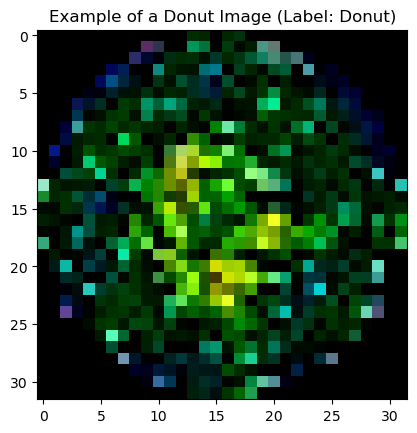

In [21]:
# Show a specific image related to the 'Donut' class
import matplotlib.pyplot as plt
import numpy as np

# Find the index of an image with 'Scratch' label
donut_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('Donut')]
if donut_indices:
  donut_index = donut_indices[20]

  # Get the image and label
  image, label = trainset[donut_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Donut Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Donut' images found in the dataset.")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


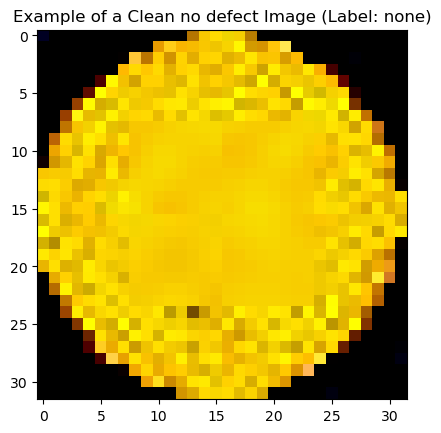

In [23]:
# Show a specific image related to the 'none' class

# Find the index of an image with 'none' label
none_indices = [i for i, label in enumerate(trainset.targets) if label == classes.index('none')]
if none_indices:
  none_index = none_indices[50]

  # Get the image and label
  image, label = trainset[none_index]

  # Display the image
  plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) # Assuming image is a tensor
  plt.title(f"Example of a Clean no defect Image (Label: {classes[label]})")
  plt.show()

else:
  print("No 'Clean no defect' images found in the dataset.")

In [25]:
# Define the LeNet5 network

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 400)
        self.fc2 = nn.Linear(400, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 9) # 9 classes

    # The forward function is now correctly defined inside the LeNet5 class
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
net = LeNet5()
print("Finished")
print(net)

Finished
LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=9, bias=True)
)


In [27]:
print('Started Training')

start = time.time()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
image_count = 0
# Training loop
num_epochs = 500

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        images, labels = data
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        image_count += labels.size(0)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{image_count + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
        #if image_count % 10 == 9:  # Print every 10 mini-batches
            #print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{image_count + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            #running_loss = 0.0
print('Finished Training')

end = time.time()
print('training time ', end-start)

Started Training
Epoch [1/500], Step [65/12], Loss: 0.0220
Epoch [1/500], Step [129/12], Loss: 0.0439
Epoch [1/500], Step [193/12], Loss: 0.0659
Epoch [1/500], Step [257/12], Loss: 0.0879
Epoch [1/500], Step [321/12], Loss: 0.1100
Epoch [1/500], Step [385/12], Loss: 0.1320
Epoch [1/500], Step [449/12], Loss: 0.1539
Epoch [1/500], Step [513/12], Loss: 0.1758
Epoch [1/500], Step [577/12], Loss: 0.1979
Epoch [1/500], Step [641/12], Loss: 0.2199
Epoch [1/500], Step [705/12], Loss: 0.2419
Epoch [1/500], Step [767/12], Loss: 0.2638
Epoch [2/500], Step [831/12], Loss: 0.0220
Epoch [2/500], Step [895/12], Loss: 0.0440
Epoch [2/500], Step [959/12], Loss: 0.0660
Epoch [2/500], Step [1023/12], Loss: 0.0880
Epoch [2/500], Step [1087/12], Loss: 0.1099
Epoch [2/500], Step [1151/12], Loss: 0.1319
Epoch [2/500], Step [1215/12], Loss: 0.1539
Epoch [2/500], Step [1279/12], Loss: 0.1759
Epoch [2/500], Step [1343/12], Loss: 0.1979
Epoch [2/500], Step [1407/12], Loss: 0.2199
Epoch [2/500], Step [1471/12], 

In [31]:
# Evaluation
net.eval()
correct = 0
total = 0
counter = 0

with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        counter +=1

print(f'Accuracy of the network on the Training images: {100 * correct / total}%')
print(f'Correct: {correct} Total: {total}')

Accuracy of the network on the Training images: 98.30287206266318%
Correct: 753 Total: 766


Accuracy of the network on the Training images: 98.30%
Correct: 753 Total: 766
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      1.00      1.00        92
           2       0.98      1.00      0.99        85
           3       1.00      0.95      0.98        88
           4       0.95      0.98      0.96        82
           5       0.95      0.95      0.95        83
           6       1.00      1.00      1.00        77
           7       0.99      0.98      0.98        89
           8       1.00      0.99      0.99        85

    accuracy                           0.98       766
   macro avg       0.98      0.98      0.98       766
weighted avg       0.98      0.98      0.98       766



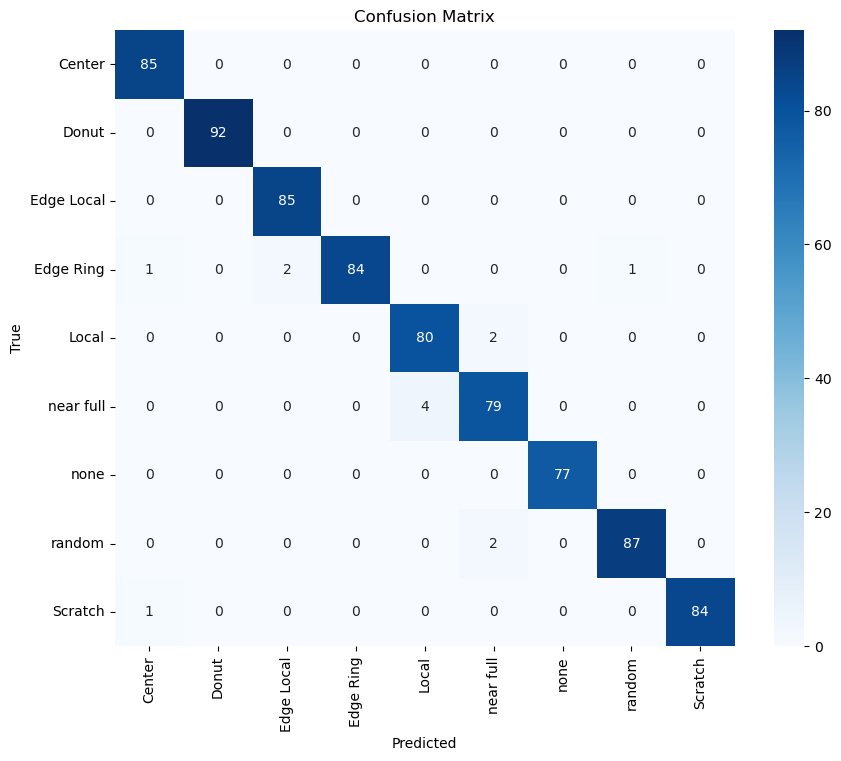

In [33]:
# Evaluation
net.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print(f'Accuracy of the network on the Training images: {100 * correct / total:.2f}%')
print(f'Correct: {correct} Total: {total}')

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(all_labels, all_predicted))

# Generate and plot the confusion matrix
cm = confusion_matrix(all_labels, all_predicted)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Evaluation
net.eval()
correct = 0
total = 0
counter = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        counter +=1

print(f'Accuracy of the network on the test images: {100 * correct / total}%')
print(f'Correct: {correct} Total: {total}')

Accuracy of the network on the test images: 73.52941176470588%
Correct: 100 Total: 136


Accuracy of the network on the test images: 73.53%
Correct: 100 Total: 136
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.77      1.00      0.87        10
           2       0.67      0.78      0.72        18
           3       0.93      0.93      0.93        14
           4       0.67      0.44      0.53        18
           5       0.50      0.53      0.51        17
           6       0.94      0.83      0.88        18
           7       0.82      0.82      0.82        11
           8       0.69      0.73      0.71        15

    accuracy                           0.74       136
   macro avg       0.75      0.76      0.75       136
weighted avg       0.74      0.74      0.73       136



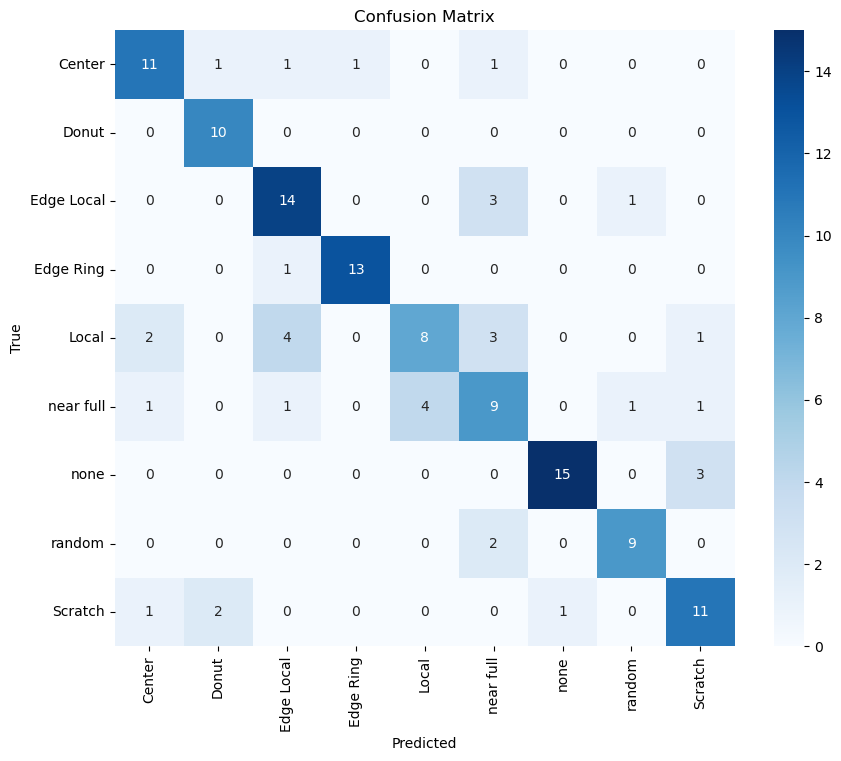

In [37]:
# Evaluation
net.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')
print(f'Correct: {correct} Total: {total}')

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(all_labels, all_predicted))

# Generate and plot the confusion matrix
cm = confusion_matrix(all_labels, all_predicted)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()